In [4]:
using QuadGK
using Polynomials

┌ Info: Precompiling QuadGK [1fd47b50-473d-5c70-9696-f719f8f3bcdc]
└ @ Base loading.jl:1186
┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1186


<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury_v2.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [2]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

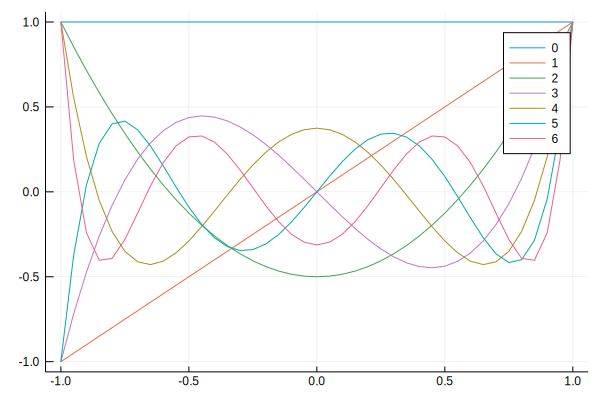

In [13]:
using Pkg, Plots, QuadGK, Polynomials

(xp,a) = gauss(Float64,7)

function legendre(k)
    if k == 0
        return Poly([1])
    end
    if k == 1
        return Poly([0, 1])
    end
    return (2*(k-1)+1)/(k) * Poly([0, 1]) * legendre(k-1) - ((k-1)/(k) * legendre(k-2))
end
    
x = -1:0.05:1
plot_ = plot(x, polyval(legendre(0), x), label="0")
for i in 1:6
    plot!(x, polyval(legendre(i), x), label=string(i))
end
plot_

In [7]:
for i in 2:4
    display("Roots of legendre ")
    display(i)
    (xp,a) = gauss(Float64,i)
    display(xp)
    display(roots(legendre(i)))
end

"Roots of legendre "

2

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896258

2-element Array{Float64,1}:
 -0.5773502691896258
  0.5773502691896256

"Roots of legendre "

3

3-element Array{Float64,1}:
 -0.7745966692414834
  0.0               
  0.7745966692414834

3-element Array{Float64,1}:
 -0.7745966692414834
  0.7745966692414833
  0.0               

"Roots of legendre "

4

4-element Array{Float64,1}:
 -0.8611363115940526
 -0.3399810435848563
  0.3399810435848563
  0.8611363115940526

4-element Array{Float64,1}:
 -0.8611363115940536 
  0.8611363115940531 
 -0.33998104358485653
  0.3399810435848563 

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [8]:
function integrate(f, k)
    (xp,a)=gauss(Float64,k)
    return sum(a .* f.(xp))
end

f(x) = x^5 + x^4
# (x^6/6 + x^5/5) x = -1 to x = 1
# 1/6 + 1/5 - (1/6 - 1/5) = 2/5 = 0.4

println("x^5 + x^4")
println("Poprawny wynik")
println(0.4)
println()
println("k=1 ", integrate(f, 1))
println("k=2 ", integrate(f, 2))
println("k=3 ", integrate(f, 3))
println("k=4 ", integrate(f, 4))
println("k=5 ", integrate(f, 5))

x^5 + x^4
Poprawny wynik
0.4

k=1 0.0
k=2 0.22222222222222232
k=3 0.40000000000000013
k=4 0.4000000000000002
k=5 0.4000000000000001


można uzyskać stopień dokładności 2n−1 (w przypadku n-punktowej kwadratury)

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [9]:
function integrate(f, k, a, b)
    g(z) = f((b+a)/2 + ((b-a)/2)*z) * (b-a)/2
    return integrate(g, k)
end

f(x) = x^5 + x^4
println("x^5 + x^4")
#integration from -1 to 1 = 0.4
println("from -1 to 1 (real solution = 0.4)")
println("k=3 ", integrate(f, 3, -1, 1))
#integration from -2 to 2 = 12.8
println("from -2 to 2 (real solution = 12.8)")
println("k=2 ", integrate(f, 2, -2, 2))
println("k=3 ", integrate(f, 3, -2, 2))
println("k=4 ", integrate(f, 4, -2, 2))

println()
f2(x) = x^7 + x^6
println("x^7 + x^6 from -2 to 2 (real solution = 36.571)")
println("k=4 ", integrate(f2, 4, -2, 2))

x^5 + x^4
from -1 to 1 (real solution = 0.4)
k=3 0.40000000000000013
from -2 to 2 (real solution = 12.8)
k=2 7.111111111111113
k=3 12.800000000000004
k=4 12.800000000000008

x^7 + x^6 from -2 to 2 (real solution = 36.571)
k=4 36.571428571428584


### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

In [10]:
f(x) = x^5 + x^4
println("x^5 + x^4")
println(quadgk(f, -1, 1))

println("rozkład normalny Gaussa od -inf do inf")
g(x) = 1 / sqrt(2*pi) * exp((-x^2) / 2)
println(quadgk(g, -Inf, Inf))

x^5 + x^4
(0.3999999999999999, 1.1102230246251565e-16)
rozkład normalny Gaussa od -inf do inf
(1.0000000000032583, 1.4395584941504537e-8)


### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.

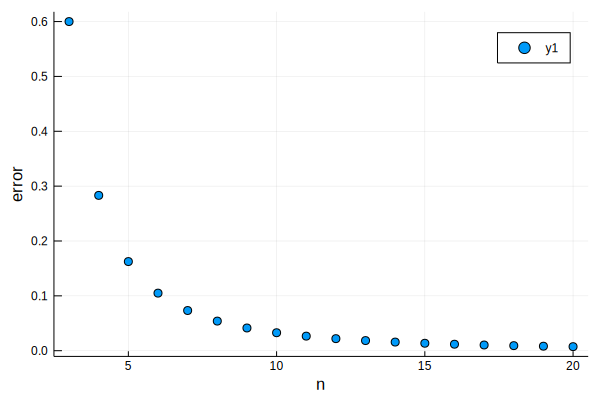

In [11]:
function trapezoidalRule(f, n, a, b)
    sum = 0
    delta = (b-a)/(n-1)
    a_ = a
    for i in 1:(n-1)
        sum = sum + 1/2 * (f(a_) + f(a_+delta)) * delta
        a_ = a_ + delta
    end
    return sum
end

f(x) = x^5 + x^4
real_solution = 0.4

err = []
xs = 3:20
for i in xs
    push!(err, abs(real_solution - trapezoidalRule(f, i, -1, 1)))
end
scatter(xs, err, xlabel="n", ylabel="error")